<a href="https://colab.research.google.com/github/JulioM07/ejercicio-01/blob/main/Comparaci%C3%B3n_de_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib import ticker
from matplotlib.ticker import MultipleLocator
from scipy.signal._signaltools import _centered
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller, kpss
import statsmodels.graphics.tsaplots as sgt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller

In [4]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
#importar datos desde google drive
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


## **Comparación de datos de Tierra y satelitales de radiación solar.**

In [11]:
#Lectura de archivos csv desde Google Drive
df1=pd.read_csv("/content/drive/MyDrive/Datos_filtrados/radiacion_diaria_24.csv")

In [12]:
#Establecer la fecha como índice
df1.index = pd.to_datetime(df1['Fecha'], format='%d/%m/%Y')
df1.drop('Fecha',axis=1, inplace=True)
df1.head()

,si,si_sat,SWDS,SWDS_SAT
Fecha,,,,
2018-11-05,270.947245,236.250000,6.50,5.67
2018-11-06,30.068933,200.416667,0.72,4.81
2018-11-07,98.625102,227.083333,2.37,5.45
2018-11-08,153.923843,185.416667,3.69,4.45
2018-11-09,179.744799,222.916667,4.31,5.35


In [13]:
df1

,si,si_sat,SWDS,SWDS_SAT
Fecha,,,,
2018-11-05,270.947245,236.250000,6.50,5.67
2018-11-06,30.068933,200.416667,0.72,4.81
2018-11-07,98.625102,227.083333,2.37,5.45
2018-11-08,153.923843,185.416667,3.69,4.45
2018-11-09,179.744799,222.916667,4.31,5.35
...,...,...,...,...
2022-10-17,253.931751,249.583333,6.09,5.99
2022-10-18,196.376682,252.916667,4.71,6.07
2022-10-19,170.621561,234.166667,4.09,5.62


In [14]:
#Resumen de las estadísticas descriptivas
df1.describe()

,si,si_sat,SWDS,SWDS_SAT
count,1447.000000,1447.000000,1447.000000,1447.000000
mean,218.198262,219.614432,5.236662,5.270746
std,65.234400,47.666769,1.565619,1.144002
min,1.366748,37.500000,0.030000,0.900000
25%,179.426773,188.333333,4.310000,4.520000
50%,221.890373,225.416667,5.330000,5.410000
75%,259.665716,254.791667,6.230000,6.115000
max,1019.600000,324.583333,24.470000,7.790000


In [15]:
#Diagnóstico de valores faltantes
df1.isna().sum()

si          0
si_sat      0
SWDS        0
SWDS_SAT    0
dtype: int64

In [35]:
#Cálculo de MAPE entre datos de Tierra con datos satelitales.
if len(df1['SWDS']) == len(df1['SWDS_SAT']):
    n = len(df1)
    mape = (100 / n) * np.sum(np.abs((df1['SWDS'] - df1['SWDS_SAT']) / df1['SWDS']))

    print(f'MAPE: {mape:.2f}%')
else:
    print('Las columnas tienen tamaños diferentes. Asegúrate de que ambas tengan la misma longitud.')

MAPE: 45.51%


In [18]:
#Cálculo de RMSE entre datos de Tierra con datos satelitales.
from sklearn.metrics import mean_squared_error

if len(df1['SWDS']) == len(df1['SWDS_SAT']):
    # Calcular el error cuadrático medio entre datos de Tierra y satelitales
    mse = mean_squared_error(df1['SWDS'], df1['SWDS_SAT'])

    # Calcular el RMSE tomando la raíz cuadrada del error cuadrático medio
    rmse = np.sqrt(mse)

    print(f'RMSE: {rmse}')
else:
    print('Las columnas tienen tamaños diferentes. Asegúrate de que ambas tengan la misma longitud.')

RMSE: 1.318396913513473


In [17]:
#Cálculo de RMSE entre datos de Tierra con datos satelitales.
if len(df1['SWDS']) == len(df1['SWDS_SAT']):
    # Calcular el error cuadrático medio entre datos de Tierra y satelitales
    mape = np.mean(np.abs((df1['SWDS'] - df1['SWDS_SAT']) / df1['SWDS'])) * 100

    print(f'RMSE en porcentaje: {mape}')
else:
    print('Las columnas tienen tamaños diferentes. Asegúrate de que ambas tengan la misma longitud.')

RMSE en porcentaje: 45.51106437874253


In [97]:
from sklearn.metrics import r2_score

# Cálculo de R^2
if len(df1['SWDS']) == len(df1['SWDS_SAT']):
    # Calcular el coeficiente de determinación (R^2)
    r_squared = r2_score(df1['SWDS'], df1['SWDS_SAT'])

    print(f'Coeficiente de Determinación (R^2): {r_squared}')
else:
    print('Las columnas tienen tamaños diferentes. Asegúrate de que ambas tengan la misma longitud.')

Coeficiente de Determinación (R^2): 0.2903889947898596


In [19]:
#Cálculo de RMSE entre datos de Tierra con datos satelitales.
from sklearn.metrics import mean_squared_error

if len(df1['si']) == len(df1['si_sat']):
    # Calcular el error cuadrático medio entre datos de Tierra y satelitales
    mse = mean_squared_error(df1['si'], df1['si_sat'])

    # Calcular el RMSE tomando la raíz cuadrada del error cuadrático medio
    rmse = np.sqrt(mse)

    print(f'RMSE: {rmse}')
else:
    print('Las columnas tienen tamaños diferentes. Asegúrate de que ambas tengan la misma longitud.')

RMSE: 54.93668071331965


In [20]:
#Cálculo de RMSE entre datos de Tierra con datos satelitales.
if len(df1['si']) == len(df1['si_sat']):
    # Calcular el error cuadrático medio entre datos de Tierra y satelitales
    mape = np.mean(np.abs((df1['si'] - df1['si_sat']) / df1['si'])) * 100

    print(f'RMSE en porcentaje: {mape}')
else:
    print('Las columnas tienen tamaños diferentes. Asegúrate de que ambas tengan la misma longitud.')

RMSE en porcentaje: 44.499723843976085


In [95]:
from sklearn.metrics import r2_score

# Cálculo de R^2
if len(df1['si']) == len(df1['si_sat']):
    # Calcular el coeficiente de determinación (R^2)
    r_squared = r2_score(df1['si'], df1['si_sat'])

    print(f'Coeficiente de Determinación (R^2): {r_squared}')
else:
    print('Las columnas tienen tamaños diferentes. Asegúrate de que ambas tengan la misma longitud.')

Coeficiente de Determinación (R^2): 0.29030503273823893


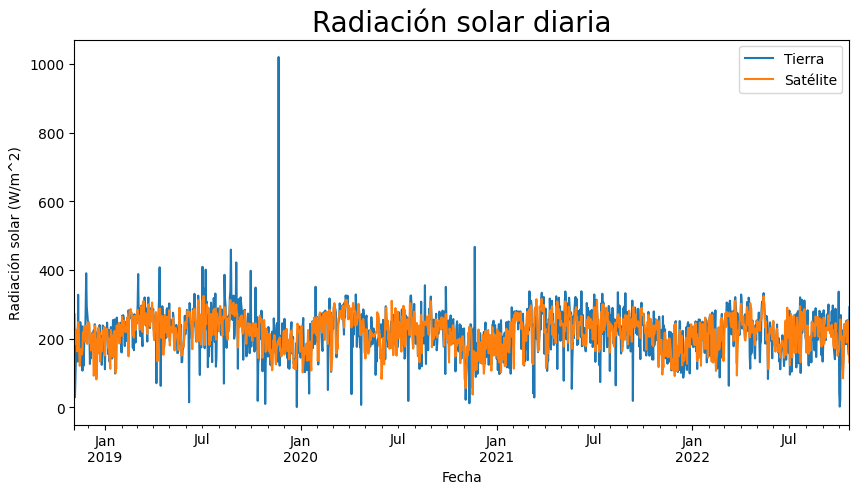

In [77]:
#Gráficar datos de radiación solar diaria - Tierra y satélite
df1.si.plot(figsize = (10,5), label='Tierra')
df1.si_sat.plot(label='Satélite')
plt.title("Radiación solar diaria", size = 20)

# Añadir etiquetas y leyenda
plt.xlabel('Fecha')
plt.ylabel('Radiación solar (W/m^2)')
plt.legend()

plt.show()

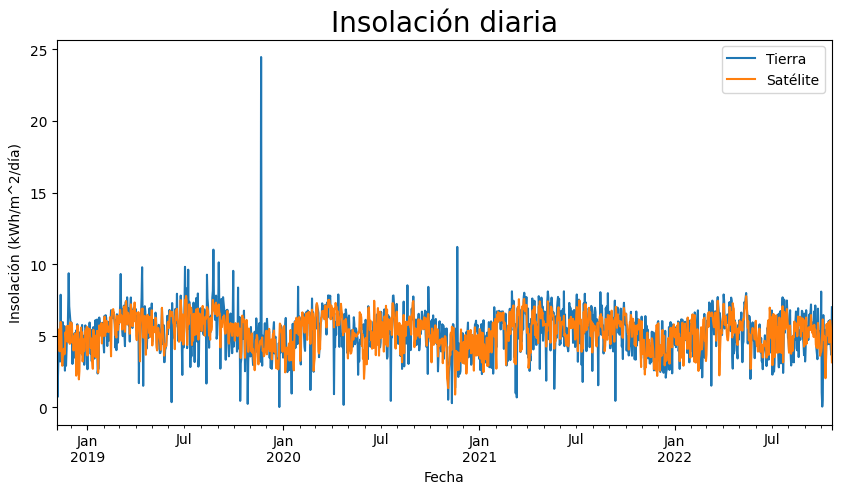

In [79]:
#Gráficar datos de insolación diaria - Tierra y satélite
df1.SWDS.plot(figsize = (10,5), label='Tierra')
df1.SWDS_SAT.plot(label='Satélite')
plt.title("Insolación diaria", size = 20)

# Añadir etiquetas y leyenda
plt.xlabel('Fecha')
plt.ylabel('Insolación (kWh/m^2/día)')
plt.legend()

plt.show()

## **Comparación de datos de Tierra y satelitales de radiación solar - Mensuales**

In [60]:
#Lectura de archivos csv desde Google Drive
df2=pd.read_csv("/content/drive/MyDrive/Datos_filtrados/radiacion_mensual_tie_sat.csv")

In [61]:
#Establecer la fecha como índice
df2.index = pd.to_datetime(df2['Fecha'], format='%d/%m/%Y')
df2.drop('Fecha',axis=1, inplace=True)
df2.head()

,si,si_sat,SWDR,SWDR_SAT
Fecha,,,,
2018-11-30,196.08,199.58,4.71,4.79
2018-12-31,197.59,187.50,4.74,4.50
2019-01-31,203.45,190.83,4.88,4.58
2019-02-28,237.03,238.75,5.69,5.73
2019-03-31,264.55,263.75,6.35,6.33


In [26]:
df2

,si,si_sat,SWDR,SWDR_SAT
Fecha,,,,
2018-11-30,196.08,199.58,4.71,4.79
2018-12-31,197.59,187.50,4.74,4.50
2019-01-31,203.45,190.83,4.88,4.58
2019-02-28,237.03,238.75,5.69,5.73
2019-03-31,264.55,263.75,6.35,6.33
2019-04-30,242.79,233.33,5.83,5.60
2019-05-31,211.78,212.08,5.08,5.09
2019-06-30,240.51,247.50,5.77,5.94
2019-07-31,251.58,257.50,6.04,6.18


In [28]:
#Resumen de las estadísticas descriptivas
df2.describe()

,si,si_sat,SWDR,SWDR_SAT
count,48.000000,48.000000,48.000000,48.000000
mean,219.242708,219.331667,5.262083,5.263958
std,28.848397,28.578859,0.691997,0.685884
min,153.540000,153.750000,3.690000,3.690000
25%,196.807500,196.670000,4.725000,4.720000
50%,223.125000,226.045000,5.355000,5.425000
75%,239.475000,240.830000,5.750000,5.780000
max,271.670000,264.170000,6.520000,6.340000


In [29]:
#Cálculo de RMSE entre datos de Tierra con datos satelitales.
from sklearn.metrics import mean_squared_error

if len(df2['si']) == len(df2['si_sat']):
    # Calcular el error cuadrático medio entre datos de Tierra y satelitales
    mse = mean_squared_error(df2['si'], df2['si_sat'])

    # Calcular el RMSE tomando la raíz cuadrada del error cuadrático medio
    rmse = np.sqrt(mse)

    print(f'RMSE: {rmse}')
else:
    print('Las columnas tienen tamaños diferentes. Asegúrate de que ambas tengan la misma longitud.')

RMSE: 11.540918236864863


In [34]:
#Cálculo de MAPE entre datos de Tierra con datos satélites.
if len(df2['si']) == len(df2['si_sat']):
    n = len(df2)
    mape = (100 / n) * np.sum(np.abs((df2['si'] - df2['si_sat']) / df2['si']))

    print(f'MAPE: {mape:.2f}%')
else:
    print('Las columnas tienen tamaños diferentes. Asegúrate de que ambas tengan la misma longitud.')

MAPE: 4.65%


In [36]:
#Cálculo de RMSE entre datos de Tierra con datos satelitales.
if len(df2['si']) == len(df2['si_sat']):
    # Calcular el error cuadrático medio entre datos de Tierra y satelitales
    mape = np.mean(np.abs((df2['si'] - df2['si_sat']) / df2['si'])) * 100

    print(f'RMSE en porcentaje: {mape}')
else:
    print('Las columnas tienen tamaños diferentes. Asegúrate de que ambas tengan la misma longitud.')

RMSE en porcentaje: 4.650890376262954


In [98]:
from sklearn.metrics import r2_score

# Cálculo de R^2
if len(df2['si']) == len(df2['si_sat']):
    # Calcular el coeficiente de determinación (R^2)
    r_squared = r2_score(df2['si'], df2['si_sat'])

    print(f'Coeficiente de Determinación (R^2): {r_squared}')
else:
    print('Las columnas tienen tamaños diferentes. Asegúrate de que ambas tengan la misma longitud.')

Coeficiente de Determinación (R^2): 0.8365515719855985


In [37]:
#Cálculo de RMSE entre datos de Tierra con datos satelitales.
from sklearn.metrics import mean_squared_error

if len(df2['SWDR']) == len(df2['SWDR_SAT']):
    # Calcular el error cuadrático medio entre datos de Tierra y satelitales
    mse = mean_squared_error(df2['SWDR'], df2['SWDR_SAT'])

    # Calcular el RMSE tomando la raíz cuadrada del error cuadrático medio
    rmse = np.sqrt(mse)

    print(f'RMSE: {rmse}')
else:
    print('Las columnas tienen tamaños diferentes. Asegúrate de que ambas tengan la misma longitud.')

RMSE: 0.2761679742475583


In [38]:
#Cálculo de MAPE entre datos de Tierra con datos satélites.
if len(df2['SWDR']) == len(df2['SWDR_SAT']):
    n = len(df2)
    mape = (100 / n) * np.sum(np.abs((df2['SWDR'] - df2['SWDR_SAT']) / df2['SWDR']))

    print(f'MAPE: {mape:.2f}%')
else:
    print('Las columnas tienen tamaños diferentes. Asegúrate de que ambas tengan la misma longitud.')

MAPE: 4.63%


In [40]:
#Cálculo de RMSE entre datos de Tierra con datos satelitales.
if len(df2['SWDR']) == len(df2['SWDR_SAT']):
    # Calcular el error cuadrático medio entre datos de Tierra y satelitales
    mape = np.mean(np.abs((df2['SWDR'] - df2['SWDR_SAT']) / df2['SWDR'])) * 100

    print(f'RMSE en porcentaje: {mape}')
else:
    print('Las columnas tienen tamaños diferentes. Asegúrate de que ambas tengan la misma longitud.')

RMSE en porcentaje: 4.634691083525679


In [100]:
from sklearn.metrics import r2_score

# Cálculo de R^2
if len(df2['SWDR']) == len(df2['SWDR_SAT']):
    # Calcular el coeficiente de determinación (R^2)
    r_squared = r2_score(df2['SWDR'], df2['SWDR_SAT'])

    print(f'Coeficiente de Determinación (R^2): {r_squared}')
else:
    print('Las columnas tienen tamaños diferentes. Asegúrate de que ambas tengan la misma longitud.')

Coeficiente de Determinación (R^2): 0.8373395409526256


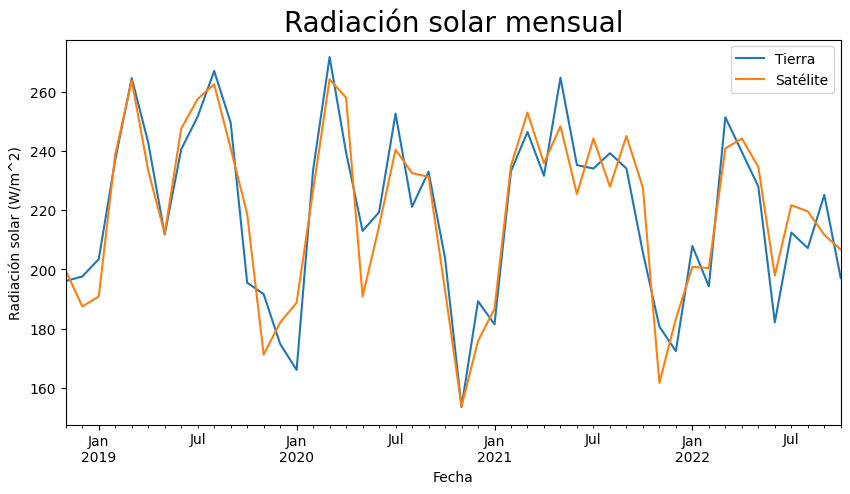

In [75]:
#Gráficar datos de radiación solar mensual - Tierra y satélite
df2.si.plot(figsize = (10,5), label='Tierra')
df2.si_sat.plot(label='Satélite')
plt.title("Radiación solar mensual", size = 20)

# Añadir etiquetas y leyenda
plt.xlabel('Fecha')
plt.ylabel('Radiación solar (W/m^2)')
plt.legend()

plt.show()

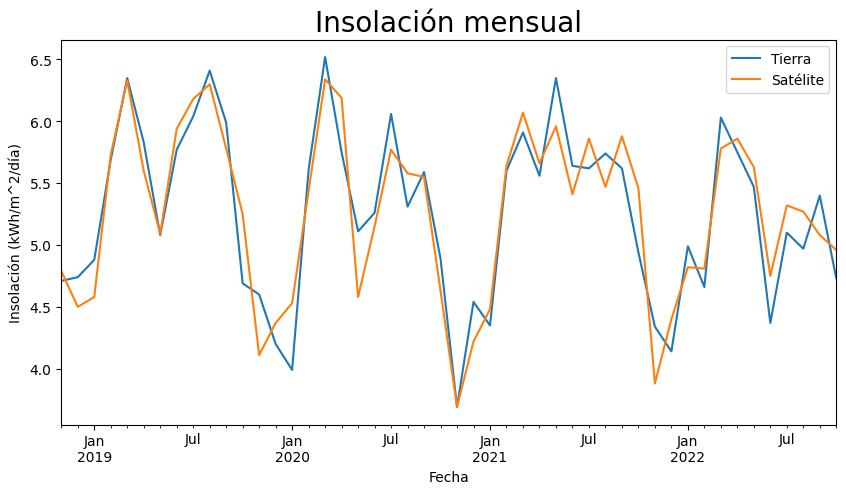

In [74]:
#Gráficar datos de insolación mensual - Tierra y satélite
df2.SWDR.plot(figsize = (10,5), label='Tierra')
df2.SWDR_SAT.plot(label='Satélite')
plt.title("Insolación mensual", size = 20)

# Añadir etiquetas y leyenda
plt.xlabel('Fecha')
plt.ylabel('Insolación (kWh/m^2/día)')
plt.legend()

plt.show()

## **Comparación de datos de Tierra y satelitales (a 2 metros) de temperatura media - Diaria**

**Datos de temperatura media diaria**

In [43]:
#Lectura de archivos csv desde Google Drive
df3=pd.read_csv("/content/drive/MyDrive/Datos_filtrados/temperatura_diaria.csv")

In [45]:
#Establecer la fecha como índice
df3.index = pd.to_datetime(df3['Fecha'], format='%d/%m/%Y')
df3.drop('Fecha',axis=1, inplace=True)
df3.head()

,tm,tm_sat
Fecha,,
2018-11-04,28.75,22.555
2018-11-05,24.10,22.680
2018-11-06,24.90,22.680
2018-11-07,27.10,22.245
2018-11-08,26.90,22.610


In [46]:
df3

,tm,tm_sat
Fecha,,
2018-11-04,28.75,22.555
2018-11-05,24.10,22.680
2018-11-06,24.90,22.680
2018-11-07,27.10,22.245
2018-11-08,26.90,22.610
...,...,...
2023-01-26,23.60,23.025
2023-01-27,19.90,21.530
2023-01-28,20.75,20.990


In [88]:
#Resumen de las estadísticas descriptivas
df3.describe()

,tm,tm_sat
count,1549.000000,1549.000000
mean,25.870932,23.563941
std,2.214440,1.941665
min,16.800000,17.535000
25%,24.400000,22.355000
50%,26.100000,23.245000
75%,27.450000,24.725000
max,32.850000,29.570000


In [48]:
#Diagnóstico de valores faltantes
df3.isna().sum()

tm        0
tm_sat    0
dtype: int64

In [51]:
#Cálculo de RMSE entre datos de Tierra con datos satelitales.
from sklearn.metrics import mean_squared_error

if len(df3['tm']) == len(df3['tm_sat']):
    # Calcular el error cuadrático medio entre datos de Tierra y satelitales
    mse = mean_squared_error(df3['tm'], df3['tm_sat'])

    # Calcular el RMSE tomando la raíz cuadrada del error cuadrático medio
    rmse = np.sqrt(mse)

    print(f'RMSE: {rmse}')
else:
    print('Las columnas tienen tamaños diferentes. Asegúrate de que ambas tengan la misma longitud.')

RMSE: 3.090033885049269


In [54]:
#Cálculo de RMSE entre datos de Tierra con datos satelitales.
if len(df3['tm']) == len(df3['tm_sat']):
    # Calcular el error cuadrático medio entre datos de Tierra y satelitales
    mape = np.mean(np.abs((df3['tm'] - df3['tm_sat']) / df3['tm'])) * 100

    print(f'RMSE en porcentaje: {mape}')
else:
    print('Las columnas tienen tamaños diferentes. Asegúrate de que ambas tengan la misma longitud.')

RMSE en porcentaje: 10.051967652742508


In [52]:
#Cálculo de MAPE entre datos de Tierra con datos satelitales.
if len(df3['tm']) == len(df3['tm_sat']):
    n = len(df3)
    mape = (100 / n) * np.sum(np.abs((df3['tm'] - df3['tm_sat']) / df3['tm']))

    print(f'MAPE: {mape:.2f}%')
else:
    print('Las columnas tienen tamaños diferentes. Asegúrate de que ambas tengan la misma longitud.')

MAPE: 10.05%


In [101]:
from sklearn.metrics import r2_score

# Cálculo de R^2
if len(df3['tm']) == len(df3['tm_sat']):
    # Calcular el coeficiente de determinación (R^2)
    r_squared = r2_score(df3['tm'], df3['tm_sat'])

    print(f'Coeficiente de Determinación (R^2): {r_squared}')
else:
    print('Las columnas tienen tamaños diferentes. Asegúrate de que ambas tengan la misma longitud.')

Coeficiente de Determinación (R^2): -0.9484051477023625


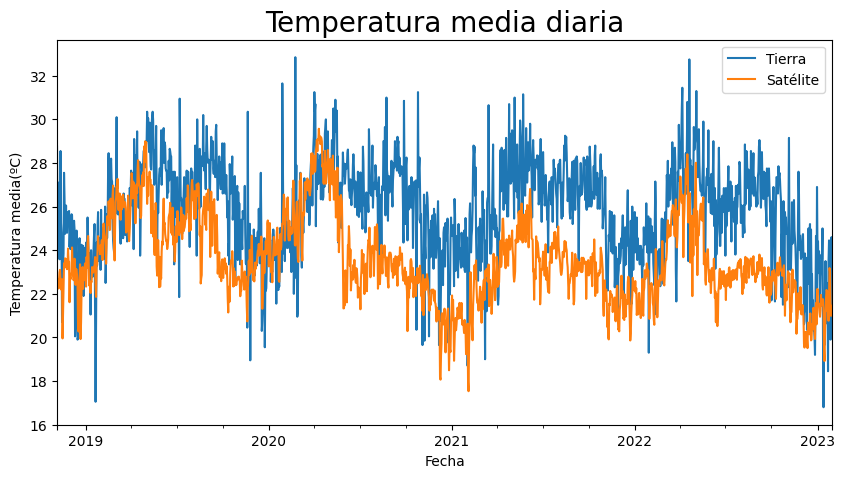

In [76]:
#Gráficar datos de radiación solar diaria - Tierra y satélite
df3.tm.plot(figsize = (10,5), label='Tierra')
df3.tm_sat.plot(label='Satélite')
plt.title("Temperatura media diaria", size = 20)

# Añadir etiquetas y leyenda
plt.xlabel('Fecha')
plt.ylabel('Temperatura media(ºC)')
plt.legend()

plt.show()

In [84]:
#Lectura de archivos csv desde Google Drive
df4=pd.read_csv("/content/drive/MyDrive/Datos_filtrados/temperatura_mensual.csv")

In [85]:
#Establecer la fecha como índice
df4.index = pd.to_datetime(df4['Fecha'], format='%d/%m/%Y')
df4.drop('Fecha',axis=1, inplace=True)
df4.head()

,tm,tm_sat
Fecha,,
2018-11-30,25.18,22.76
2018-12-31,23.33,22.61
2019-01-31,23.55,23.32
2019-02-28,25.44,25.04
2019-03-31,25.76,25.92


In [86]:
df4

,tm,tm_sat
Fecha,,
2018-11-30,25.18,22.76
2018-12-31,23.33,22.61
2019-01-31,23.55,23.32
2019-02-28,25.44,25.04
2019-03-31,25.76,25.92
2019-04-30,27.29,27.06
2019-05-31,28.31,25.30
2019-06-30,27.45,24.88
2019-07-31,26.40,25.47


In [89]:
#Resumen de las estadísticas descriptivas
df4.describe()

,tm,tm_sat
count,51.000000,51.000000
mean,25.865882,23.562549
std,1.621018,1.722542
min,22.320000,20.350000
25%,24.340000,22.490000
50%,26.400000,23.260000
75%,27.095000,24.820000
max,28.310000,28.290000


In [90]:
df4.isna().sum()

tm        0
tm_sat    0
dtype: int64

In [91]:
#Cálculo de RMSE entre datos de Tierra con datos satelitales.
from sklearn.metrics import mean_squared_error

if len(df4['tm']) == len(df4['tm_sat']):
    # Calcular el error cuadrático medio entre datos de Tierra y satelitales
    mse = mean_squared_error(df4['tm'], df4['tm_sat'])

    # Calcular el RMSE tomando la raíz cuadrada del error cuadrático medio
    rmse = np.sqrt(mse)

    print(f'RMSE: {rmse}')
else:
    print('Las columnas tienen tamaños diferentes. Asegúrate de que ambas tengan la misma longitud.')

RMSE: 2.677943679941977


In [92]:
#Cálculo de RMSE entre datos de Tierra con datos satelitales.
if len(df4['tm']) == len(df4['tm_sat']):
    # Calcular el error cuadrático medio entre datos de Tierra y satelitales
    mape = np.mean(np.abs((df4['tm'] - df4['tm_sat']) / df4['tm'])) * 100

    print(f'RMSE en porcentaje: {mape}')
else:
    print('Las columnas tienen tamaños diferentes. Asegúrate de que ambas tengan la misma longitud.')

RMSE en porcentaje: 8.991444982941795


In [93]:
#Cálculo de MAPE entre datos de Tierra con datos satelitales.
if len(df4['tm']) == len(df4['tm_sat']):
    n = len(df4)
    mape = (100 / n) * np.sum(np.abs((df4['tm'] - df4['tm_sat']) / df4['tm']))

    print(f'MAPE: {mape:.2f}%')
else:
    print('Las columnas tienen tamaños diferentes. Asegúrate de que ambas tengan la misma longitud.')

MAPE: 8.99%


In [102]:
from sklearn.metrics import r2_score

# Cálculo de R^2
if len(df4['tm']) == len(df4['tm_sat']):
    # Calcular el coeficiente de determinación (R^2)
    r_squared = r2_score(df4['tm'], df4['tm_sat'])

    print(f'Coeficiente de Determinación (R^2): {r_squared}')
else:
    print('Las columnas tienen tamaños diferentes. Asegúrate de que ambas tengan la misma longitud.')

Coeficiente de Determinación (R^2): -1.783730271725815


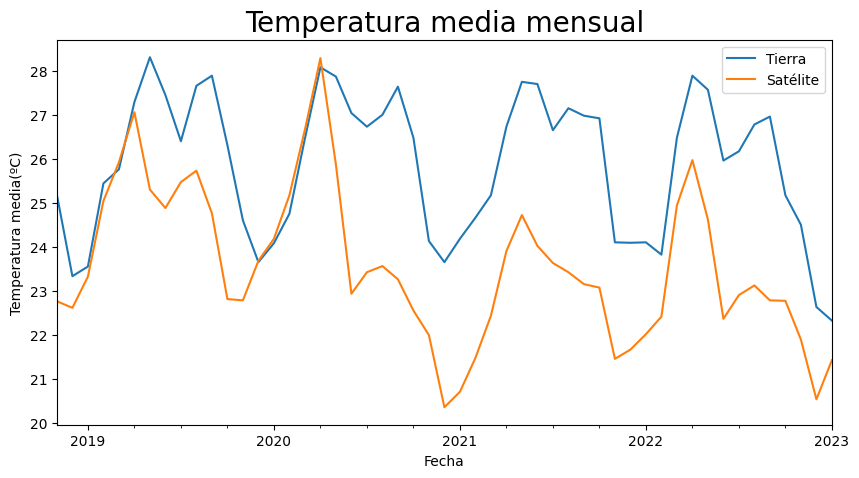

In [94]:
#Gráficar datos de radiación solar diaria - Tierra y satélite
df4.tm.plot(figsize = (10,5), label='Tierra')
df4.tm_sat.plot(label='Satélite')
plt.title("Temperatura media mensual", size = 20)

# Añadir etiquetas y leyenda
plt.xlabel('Fecha')
plt.ylabel('Temperatura media(ºC)')
plt.legend()

plt.show()